In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df.dropna(inplace=True)

In [5]:
x=df.drop("Schooling",axis=1)
y=df["Schooling"] # target


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
y_pred=model.predict(x_test)
y_pred

array([10.9, 13.7, 16.4, 11.6,  6.6,  9.9, 12.3, 13.1, 16.5, 11.3, 15.1,
       15.2, 16. , 10.7, 10.3, 11.1, 15.7, 16.1, 13.4, 12.7, 16.9, 13.4,
       13.3, 13. ,  9.1, 13.8, 14.4, 13.7, 18.6, 11.7,  9.5, 12.8,  9.9,
       16.6, 14.1, 14.6, 11.3,  9.1, 10.8, 15.5, 10.4, 16.7, 13. , 10.9,
       15.3, 10.6, 13.4, 12.3, 11.5, 13.6,  8.5, 10.5, 10.7, 12.6, 16.4,
        5.2, 13.5, 14.7, 12.7,  7.7,  4.9,  7.7, 12.6, 12.5, 13.3, 14.4,
        8.6, 14.6, 13.4, 11.4, 13.2, 12.4, 13. ,  7.9, 13.3, 14.7, 10.5,
        7.7, 16.3, 18.8, 11.7, 12.9, 15.8, 11.5, 10.3, 13.2, 12.1,  7.8,
       12.9,  9.9, 12.9, 14.7, 14.6, 11.1, 15.3, 12.4, 10.4, 14.8, 15.6,
       11.1, 11. , 14.7, 12.3,  7.5, 13.8, 13.3, 16. , 15.1,  6.4, 12.1,
       12.5, 10.7, 15.3, 11.9, 13.7, 13.8, 10.6, 12.6, 11.6,  9.4, 12.9,
        6.2,  8.5, 13.2, 12.6, 16.4, 16.4,  8.6, 10.7,  9.8, 14.8, 12.6,
       12.9, 12.8, 15.5, 15.8, 12.4, 11.8, 11.9, 16. , 15.8, 10.7, 11.7,
        4.4, 11.3, 10.9, 14.3, 13.5, 13.7,  6.2, 15

In [9]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:0.7398787878787878
Root Mean Squared Error:0.8601620707045782


In [10]:
score=r2_score(y_test,y_pred)
score

0.9003136861038903

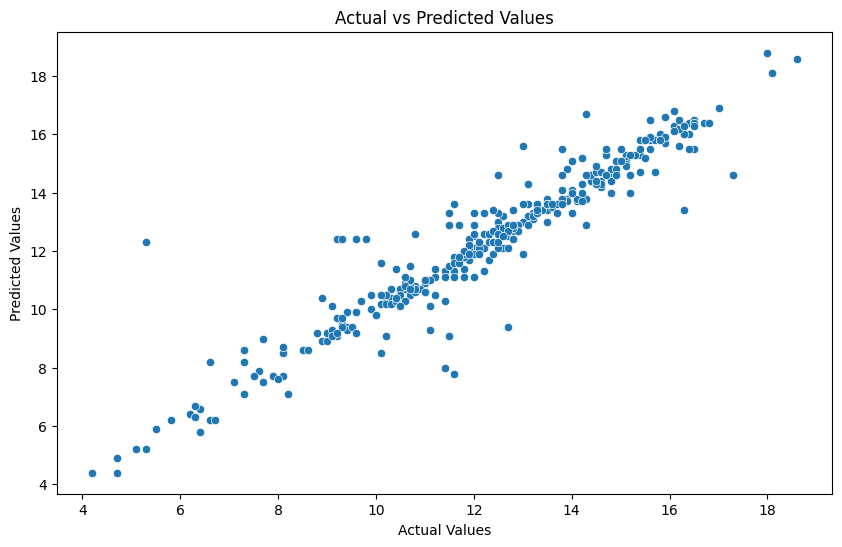

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()  

In [12]:
new_data=pd.DataFrame({
    "Country":label.fit_transform(["Zimbabwe"]),
    "Year":2003,
    "Status":label.fit_transform(["Developing"]),
    "Life expectancy":44.5,
    "Adult Mortality":222.0,
    "infant deaths":65,
    "Alcohol":0.01,
    "percentage expenditure":6.097109,
    "Hepatitis B":54.0,
    "Measles":340,
    "Polio":55.0,
    "Total expenditure":5.67,
    "Diphtheria":54.8,
    "HIV/AIDS":54.0,
    "GDP":57.34834,
    "Population":125525.0,
    "thinness 1-19 years":8.9,
    "thinness 5-9 years":1.8,
    "Income composition of resources":0.562,

})
prediction=model.predict(new_data)
prediction

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Diphtheria
- HIV/AIDS
- Life expectancy
- Measles
- thinness 1-19 years
- ...
Feature names seen at fit time, yet now missing:
-  BMI 
-  HIV/AIDS
-  thinness  1-19 years
-  thinness 5-9 years
- Diphtheria 
- ...
